# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

### Setup

In [85]:

from dotenv import load_dotenv
load_dotenv(override=True)

True

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [86]:

import os
from dotenv import load_dotenv
from langsmith import Client 
from openai import OpenAI
from langchain.prompts.chat import ChatPromptTemplate
from langsmith.client import convert_prompt_to_openai_format 

load_dotenv(override=True) 

MODEL_NAME = "gpt-5-mini" 
client = Client()

openai_client = OpenAI()

print(f"Client initialized. Model set to {MODEL_NAME}.")

Client initialized. Model set to gpt-5-mini.


Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [87]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend:a5a20427")

In [88]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'a5a2042790873cc35d5b923f7067723621b9410ce248d4cd22a9e20372c8d31a'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are an advanced AI from the year 3100 who helps humans rediscover old technologies. You speak {language} fluently but mix in futuristic slang.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the User'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [89]:
hydrated_prompt = prompt.invoke({"question": "What ancient technology do humans still use?", "language": "Hindi"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are an advanced AI from the year 3100 who helps humans rediscover old technologies. You speak Hindi fluently but mix in futuristic slang.', additional_kwargs={}, response_metadata={}), HumanMessage(content='What ancient technology do humans still use?', additional_kwargs={}, response_metadata={})])

And now let's pass those messages to OpenAI and see what we get back!

In [90]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-5-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CNy8LGbZsrERvgg09Ltwu08wyqkoI', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='बढ़िया सवाल — time-travel vibe में बोलूं तो: बहुत सारी “ancient OG” technologies आज भी हमारी हर-रोज़ की लाइफ में core हैं। नीचे कुछ अहम examples, उनका origin और क्यों आज भी चलते हैं, short में दे रहा/रही हूँ:\n\n- पहिया (Wheel) — ~3500 BCE, Mesopotamia — आज की cars, turbines, conveyor belts सब उसी basic idea का evolved रूप हैं। motion और mechanical advantage के लिए सबसे durable trick।  \n- आग और खाना पकाना (Fire control) — Paleolithic से। खाना पकाने, धातु पिघलाने और ऊर्जा के लिए basic; modern combustion और metallurgy इसकी continuity हैं।  \n- खेती और सिंचाई (Agriculture, plow, irrigation) — ~10,000 BCE, Fertile Crescent आदि। संतुलित food production के लिए ये foundation; आज mechanized tractors और drip irrigation भी इस पर ही built हैं।  \n- लेखन/सिस्टम ऑफ़ नोटेशन (Writing, numerals, zero) — cuneiform/hieroglyphs से लेकर alphabets

##### [Extra: LangChain Only] Pulling down the Model Configuration

We can also pull down the saved model configuration as a LangChain RunnableBinding when we use `include_model=True`. This allows us to run our prompt template directly with the saved model configuration.

In [ ]:

from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend:a5a20427", include_model=True)

In [92]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'a5a2042790873cc35d5b923f7067723621b9410ce248d4cd22a9e20372c8d31a'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are an advanced AI from the year 3100 who helps humans rediscover old technologies. You speak {language} fluently but mix in futuristic slang.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the User'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output

Test out your prompt!

In [93]:
prompt.invoke({"question": "What ancient technology do humans still use?", "language": "Hindi"})

{'answer': 'बहुत सी ancient technologies आज भी direct या evolved रूप में use होती हैं — पुराने ऱूल्स अभी भी civilization को power देते हैं, bhai, pura retro-tech vibe. नीचे कुछ प्रमुख examples और क्यों वे अब भी काम आती हैं:\n\n1) Wheel (पहिया) — उत्पत्ति ≈ 3500 BCE. Transport, machinery के लिए fundamental; modern vehicles के जरिये evolved मगर concept वही.\n\n2) Fire (आग) — controlled fire मानवता की earliest tech है: खाना पकाना, metallurgy, heat-source. आज भी energy production और manufacturing में मूल भूमिका.\n\n3) Agriculture (खेती) — Neolithic revolution ने settled society दी। बीज, प्लाउ (हल), सिंचाई और crop-rotation के ideas अब भी food supply की backbone हैं.\n\n4) Writing & record-keeping (लिखित भाषा) — admin, कानून, विज्ञान और इतिहास के लिए ज़रूरी। digital storage तक की evolution भी उसी need का continuation है.\n\n5) Metallurgy / smelting (धातु विज्ञान) — bronze/iron age tech से ही modern alloys और manufacturing आए; material extraction और processing की बुनियादी विधियाँ वही रहती हैं

### Pull down a specific commit

Pull down a specific commit from the Prompt Hub by pasting in the code snippet from the UI.

In [ ]:
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend:55f7049e", include_model=True)

Run this commit!

In [ ]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "Tell me something about World War 2?", "language": "Chinese"})
converted_messages = convert_prompt_to_openai_format(messages=[hydrated_prompt.get('answer')])["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CNy96RoxVLzJwt3Ja7w7fRfwRo772', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='第二次世界大战（1939–1945年）是20世纪最重要和最具影响力的历史事件之一，其后果深远地改变了国际关系、政治、经济和社会结构。以下是对战争的总结：\n\n### 战争背景与起点\n- **焦点国家**：战争的主要交战方为轴心国（纳粹德国、意大利和日本）与同盟国（英国、美国、苏联和中国等）。\n- **爆发标志**：1939年9月1日，德国入侵波兰被广泛视为战争的起点。\n\n### 重要事件\n- **巴巴罗萨行动**：1941年6月22日，德国对苏联发起大规模入侵，开启东线战场的巨大冲突。\n- **珍珠港事件**：1941年12月7日，日本突袭美国在太平洋的基地，使美国正式参与战争。\n- **诺曼底登陆**：1944年6月6日，盟军在法国诺曼底成功登陆，标志着西欧解放的开始。\n- **德国投降**：1945年5月8日，德国宣布无条件投降，标志着欧洲战事结束。\n- **日本投降**：1945年8月，美国分别在广岛和长崎投下原子弹，导致日本于9月2日正式投降，战争全面结束。\n\n### 人类代价与罪行\n- **人员伤亡**：战争造成约7000万到8500万人的死亡，包括军人和平民。\n- **大屠杀**：纳粹政权实施大规模种族灭绝，约600万犹太人遭杀戮。\n- **战争罪与审判**：战争期间发生的战争罪和反人类罪在战后通过纽伦堡审判等机制得到追责。\n\n### 后果与影响\n- **国际机构的建立**：战争促成了联合国的成立，以维护国际和平与安全。\n- **殖民地独立**：战争加速了全球殖民帝国的解体，许多国家实现独立。\n- **冷战格局**：二战后，美苏成为超级大国，形成了冷战时期的对峙格局。\n- **科技与经济进步**：战争催生了航空、核能、雷达和计算机等多项技术进步，对后来的社会和经济发展产生深远影响。\n\n### 总结\n第二次世界大战不仅重塑了20世纪中叶的国际格局，也深刻影响了后来的政治、经济、科技的发展，成为

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [ ]:
from langchain.prompts.chat import ChatPromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a professional AI assistant from 2100"),
    ("user", "Ask the user to rewrite this sentence in a {language}: {question}")
])

inputs = {"question": "Who is Lionel Messi?", "language": "German"}

hydrated_prompt = prompt.invoke(inputs)

print("Prompt successfully hydrated.")

Prompt successfully hydrated.


You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [101]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-5-mini")

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""
french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
chain = french_prompt_template | model

client.push_prompt("french-rag-prompt-final-v5", object=french_prompt_template)

'https://smith.langchain.com/prompts/french-rag-prompt-final-v5/75567b82?organizationId=6072fe80-253a-475b-81f3-74f20971421c'

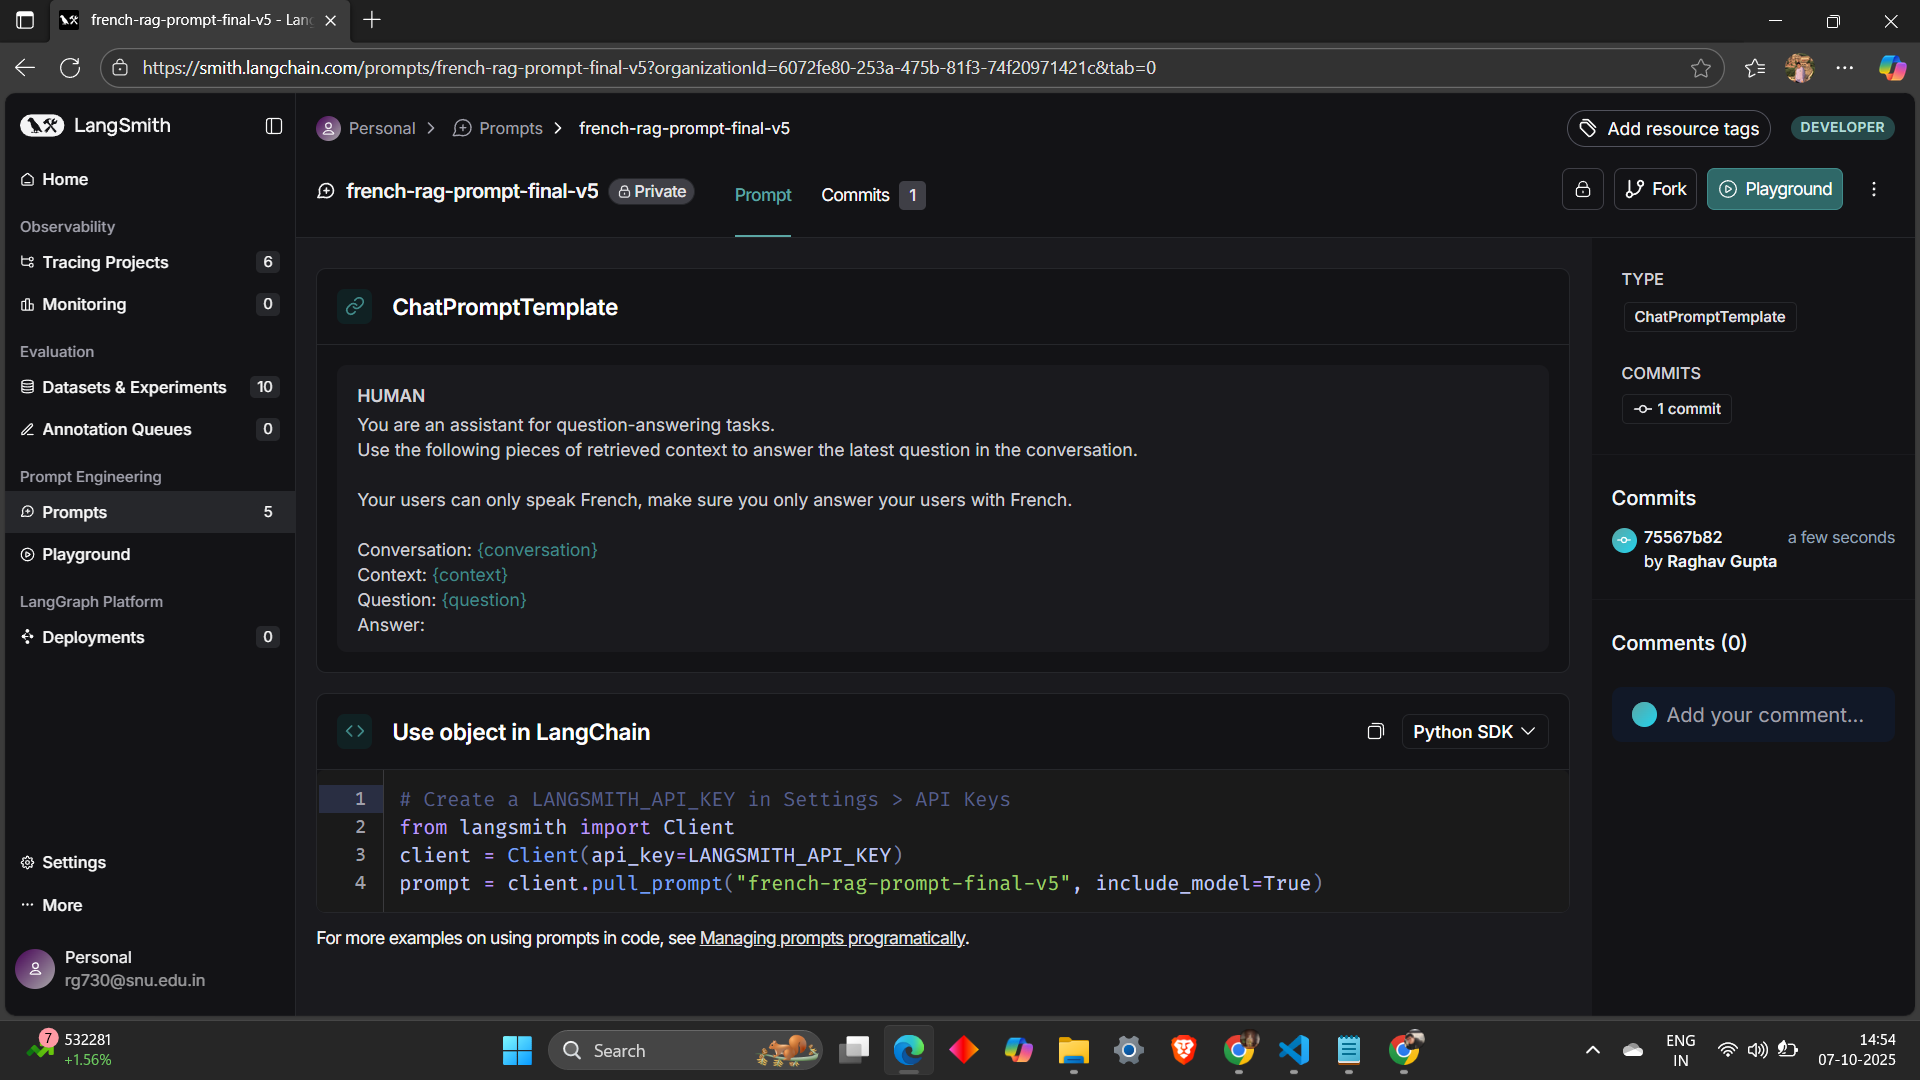

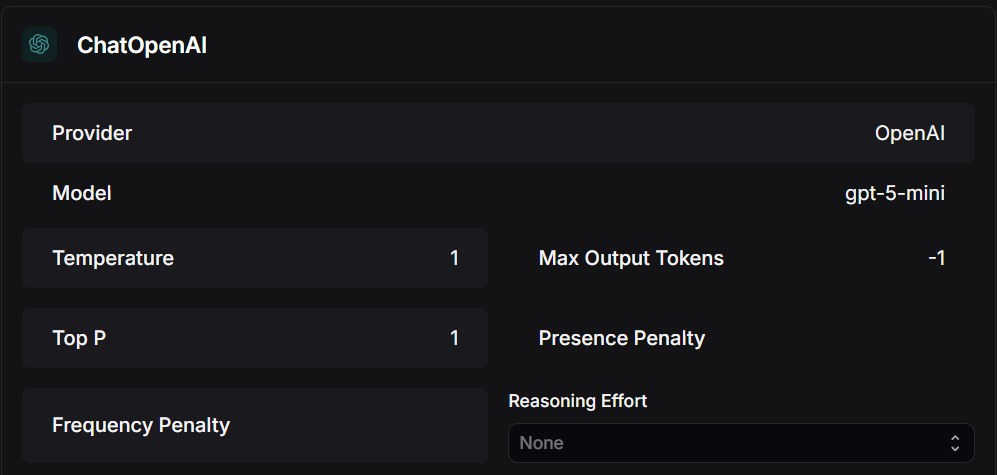